# Mini-opdracht: Klanttevredenheid

## Doelstelling van de opdracht

Een bank probeert vroegtijdig ontevreden klanten op te sporen.  Gegeven is een dataset "customersatisfaction.csv" met geanonimiseerde gegevens van hun klanten en de bijhorende klantentevredenheid. De features zelf werden ook geanonimiseerd. De target kolom is de variabele die voorspeld moet worden. 1 staat voor ontevreden klanten, 0 staat voor tevreden klanten.

In [1]:
!pip install scikit-learn
#!pip install scikit-image
!pip install pandas
!pip install seaborn
!pip install scikit-optimize
!pip install imbalanced-learn
!pip install scikeras

You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [52]:
%matplotlib inline
import os
os.environ['KERAS_BACKEND'] = 'tensorflow'

import matplotlib.pyplot as plt
#from matplotlib.colors import ListedColormap
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
#from sklearn.decomposition import PCA

#from sklearn.datasets import make_blobs

#import matplotlib.image as mpimg
#from skimage.io import imread, imshow

# distributions
#from scipy.stats import randint
#from scipy.stats import uniform
from scipy import stats

# Import Keras libraries
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation
from tensorflow.keras.optimizers import SGD, Adam, Adagrad
from tensorflow.keras.layers import Dense, Dropout,BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
#from tensorflow.keras.preprocessing import image
from tensorflow.keras.losses import BinaryCrossentropy, BinaryFocalCrossentropy
from tensorflow.keras import initializers
from tensorflow.keras import regularizers

# Libraries for Early stopping, ModelCheckpoint & load_model
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

from sklearn.svm import SVC # Support Vector Classifier

from scikeras.wrappers import KerasClassifier

In [3]:
#pd.set_option("max_columns"=100) # show all cols
#pd.set_option('max_colwidth', None) # show full width of showing cols
pd.set_option("expand_frame_repr", False) # print cols side by side as it's supposed to be
pd.options.display.max_seq_items = None
pd.options.display.max_rows = None
pd.options.display.max_columns = None
pd.options.display.max_colwidth = None

## Import & clean data

In [120]:
# Load dataset
df_raw = pd.read_csv("../DATA/customersatisfaction.csv")
print(len(df_raw))

76020


In [121]:
df_raw.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,ind_var14_0,ind_var14,ind_var17_0,ind_var17,ind_var18_0,ind_var18,ind_var19,ind_var20_0,ind_var20,ind_var24_0,ind_var24,ind_var25_cte,ind_var26_0,ind_var26_cte,ind_var26,ind_var25_0,ind_var25,ind_var27_0,ind_var28_0,ind_var28,ind_var27,ind_var29_0,ind_var29,ind_var30_0,ind_var30,ind_var31_0,ind_var31,ind_var32_cte,ind_var32_0,ind_var32,ind_var33_0,ind_var33,ind_var34_0,ind_var34,ind_var37_cte,ind_var37_0,ind_var37,ind_var39_0,ind_var40_0,ind_var40,ind_var41_0,ind_var41,ind_var39,ind_var44_0,ind_var44,ind_var46_0,ind_var46,num_var1_0,num_var1,num_var4,num_var5_0,num_var5,num_var6_0,num_var6,num_var8_0,num_var8,num_var12_0,num_var12,num_var13_0,num_var13_corto_0,num_var13_corto,num_var13_largo_0,num_var13_largo,num_var13_medio_0,num_var13_medio,num_var13,num_var14_0,num_var14,num_var17_0,num_var17,num_var18_0,num_var18,num_var20_0,num_var20,num_var24_0,num_var24,num_var26_0,num_var26,num_var25_0,num_var25,num_op_var40_hace2,num_op_var40_hace3,num_op_var40_ult1,num_op_var40_ult3,num_op_var41_hace2,num_op_var41_hace3,num_op_var41_ult1,num_op_var41_ult3,num_op_var39_hace2,num_op_var39_hace3,num_op_var39_ult1,num_op_var39_ult3,num_var27_0,num_var28_0,num_var28,num_var27,num_var29_0,num_var29,num_var30_0,num_var30,num_var31_0,num_var31,num_var32_0,num_var32,num_var33_0,num_var33,num_var34_0,num_var34,num_var35,num_var37_med_ult2,num_var37_0,num_var37,num_var39_0,num_var40_0,num_var40,num_var41_0,num_var41,num_var39,num_var42_0,num_var42,num_var44_0,num_var44,num_var46_0,num_var46,saldo_var1,saldo_var5,saldo_var6,saldo_var8,saldo_var12,saldo_var13_corto,saldo_var13_largo,saldo_var13_medio,saldo_var13,saldo_var14,saldo_var17,saldo_var18,saldo_var20,saldo_var24,saldo_var26,saldo_var25,saldo_var28,saldo_var27,saldo_var29,saldo_var30,saldo_var31,saldo_var32,saldo_var33,saldo_var34,saldo_var37,saldo_var40,saldo_var41,saldo_var42,saldo_var44,saldo_var46,var36,delta_imp_amort_var18_1y3,delta_imp_amort_var34_1y3,delta_imp_aport_var13_1y3,delta_imp_aport_var17_1y3,delta_imp_aport_var33_1y3,delta_imp_compra_var44_1y3,delta_imp_reemb_var13_1y3,delta_imp_reemb_var17_1y3,delta_imp_reemb_var33_1y3,delta_imp_trasp_var17_in_1y3,delta_imp_trasp_var17_out_1y3,delta_imp_trasp_var33_in_1y3,delta_imp_trasp_var33_out_1y3,delta_imp_venta_var44_1y3,delta_num_aport_var13_1y3,delta_num_aport_var17_1y3,delta_num_aport_var33_1y3,delta_num_compra_var44_1y3,delta_num_reemb_var13_1y3,delta_num_reemb_var17_1y3,delta_num_reemb_var33_1y3,delta_num_trasp_var17_in_1y3,delta_num_trasp_var17_out_1y3,delta_num_trasp_var33_in_1y3,delta_num_trasp_var33_out_1y3,delta_num_venta_var44_1y3,imp_amort_var18_hace3,imp_amort_var18_ult1,imp_amort_var34_hace3,imp_amort_var34_ult1,imp_aport_var13_hace3,imp_aport_var13_ult1,imp_aport_var17_hace3,imp_aport_var17_ult1,imp_aport_var33_hace3,imp_aport_var33_ult1,imp_var7_emit_ult1,imp_var7_recib_ult1,imp_compra_var44_hace3,imp_compra_var44_ult1,imp_reemb_var13_hace3,imp_reemb_var13_ult1,imp_reemb_var17_hace3,imp_reemb_var17_ult1,imp_reemb_var33_hace3,imp_reemb_var33_ult1,imp_var43_emit_ult1,imp_trans_var37_ult1,imp_trasp_var17_in_hace3,imp_trasp_var17_in_ult1,imp_trasp_var17_out_hace3,imp_trasp_var17_out_ult1,imp_trasp_var33_in_hace3,imp_trasp_var33_in_ult1,imp_trasp_var33_out_hace3,imp_trasp_var33_out_ult1,imp_venta_var44_hace3,imp_venta_var44_ult1,ind_var7_emit_ult1,ind_var7_recib_ult1,ind_var10_ult1,ind_var10

In [122]:
df_raw.info()
# All columns are numeric -> OK, no dummy encoding necessary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


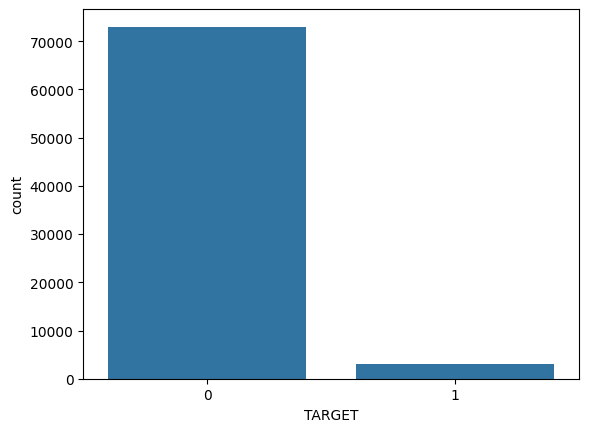

In [123]:
sns.countplot(data=df_raw, x='TARGET');   # Unbalanced dataset -> important for SVM

In [124]:
print(df_raw.isna().sum())

ID                               0
var3                             0
var15                            0
imp_ent_var16_ult1               0
imp_op_var39_comer_ult1          0
imp_op_var39_comer_ult3          0
imp_op_var40_comer_ult1          0
imp_op_var40_comer_ult3          0
imp_op_var40_efect_ult1          0
imp_op_var40_efect_ult3          0
imp_op_var40_ult1                0
imp_op_var41_comer_ult1          0
imp_op_var41_comer_ult3          0
imp_op_var41_efect_ult1          0
imp_op_var41_efect_ult3          0
imp_op_var41_ult1                0
imp_op_var39_efect_ult1          0
imp_op_var39_efect_ult3          0
imp_op_var39_ult1                0
imp_sal_var16_ult1               0
ind_var1_0                       0
ind_var1                         0
ind_var2_0                       0
ind_var2                         0
ind_var5_0                       0
ind_var5                         0
ind_var6_0                       0
ind_var6                         0
ind_var8_0          

In [125]:
df = df_raw.copy()

In [126]:
# Check number of lines with at least 1 outlier
rows_with_outliers = len(df_raw[(np.abs(stats.zscore(df_raw)) > 5).any(axis=1)])
print(f"{rows_with_outliers} rows with at least 1 outlier.")

14244 rows with at least 1 outlier.


In [127]:
# Detect outliers
df_descr = df_raw.describe()

for col in df_descr.columns:
    lv_min = df_descr[col].loc['min']
    lv_max = df_descr[col].loc['max']
    lv_std = df_descr[col].loc['std']
    if ( np.abs(lv_min) / np.abs(lv_std) ) > 5:
        print(f"Outlier(s) in column {col}: min = {lv_min}, std = {lv_std}.")
    if lv_max != 1 and ( np.abs(lv_max) / np.abs(lv_std) ) > 5:
        print(f"Outlier(s) in column {col}: max = {lv_max}, std = {lv_std}.")

Outlier(s) in column var3: min = -999999.0, std = 39033.462363863284.
Outlier(s) in column var15: max = 105.0, std = 12.956485816411226.
Outlier(s) in column imp_ent_var16_ult1: max = 210000.0, std = 1614.7573127238222.
Outlier(s) in column imp_op_var39_comer_ult1: max = 12888.03, std = 339.315830906626.
Outlier(s) in column imp_op_var39_comer_ult3: max = 21024.81, std = 546.266294057292.
Outlier(s) in column imp_op_var40_comer_ult1: max = 8237.82, std = 93.15574870597062.
Outlier(s) in column imp_op_var40_comer_ult3: max = 11073.57, std = 153.7370655548387.
Outlier(s) in column imp_op_var40_efect_ult1: max = 6600.0, std = 30.604863766118754.
Outlier(s) in column imp_op_var40_efect_ult3: max = 6600.0, std = 36.51351321459827.
Outlier(s) in column imp_op_var40_ult1: max = 8237.82, std = 95.2682043651314.
Outlier(s) in column imp_op_var41_comer_ult1: max = 12888.03, std = 319.6055161935651.
Outlier(s) in column imp_op_var41_comer_ult3: max = 16566.81, std = 512.1548226015158.
Outlier(s) 

<ipython-input-127-713884acd202>:8: RuntimeWarning: invalid value encountered in double_scalars
  if ( np.abs(lv_min) / np.abs(lv_std) ) > 5:
<ipython-input-127-713884acd202>:10: RuntimeWarning: invalid value encountered in double_scalars
  if lv_max != 1 and ( np.abs(lv_max) / np.abs(lv_std) ) > 5:


In [128]:
print(f"No. of records before removing outliers: {len(df)}.")
df1 = df.copy()   # Back-up
      
print(f"No. of lines with value -999999.0: {len(df[df.eq(-999999.0,).any(axis=1)])}.")
print(f"No. of lines with value 9999999999.0: {len(df[df.eq(9999999999.0,).any(axis=1)])}.")

No. of records before removing outliers: 76020.
No. of lines with value -999999.0: 116.
No. of lines with value 9999999999.0: 535.


In [129]:
df.drop(labels=list(df[df.eq(-999999.0,).any(axis=1)].index), axis='index', inplace=True)
df.drop(labels=list(df[df.eq(9999999999.0,).any(axis=1)].index), axis='index', inplace=True)

print(f"No. of records after removing outliers: {len(df)}.")

No. of records after removing outliers: 75369.


In [130]:
# Drop columns with only zeros
counter = 0

print(f"No. of features before removing all-zeros: {len(df.columns)}.")
for col in df.columns:
    if len(df[col].unique()) == 1 and df[col][0] == 0:
#        print(col)
        df.drop(col, axis='columns', inplace=True)
        counter += 1
        
print(f"{counter} columns with only zeros dropped.")
print(f"No. of features after removing all-zeros: {len(df.columns)}.")

No. of features before removing all-zeros: 371.
70 columns with only zeros dropped.
No. of features after removing all-zeros: 301.


## Prepare data

In [131]:
X = df.drop(['ID', 'TARGET'], axis='columns')
y = df['TARGET']

In [132]:
# List non-zero values per column
nonzeros = X.astype(bool).sum(axis=0)
nonzeros

var3                             75294
var15                            75369
imp_ent_var16_ult1                3675
imp_op_var39_comer_ult1           9883
imp_op_var39_comer_ult3          11619
imp_op_var40_comer_ult1            287
imp_op_var40_comer_ult3            340
imp_op_var40_efect_ult1             38
imp_op_var40_efect_ult3             45
imp_op_var40_ult1                  223
imp_op_var41_comer_ult1           9735
imp_op_var41_comer_ult3          11471
imp_op_var41_efect_ult1           6636
imp_op_var41_efect_ult3           8587
imp_op_var41_ult1                11553
imp_op_var39_efect_ult1           6647
imp_op_var39_efect_ult3           8599
imp_op_var39_ult1                11669
imp_sal_var16_ult1                  94
ind_var1_0                         841
ind_var1                           277
ind_var5_0                       72209
ind_var5                         50085
ind_var6_0                           7
ind_var6                             2
ind_var8_0               

In [133]:
# Check if dataset is sparse
sparsity = round( ( X.astype(bool).sum(axis=0).sum() / ( X.shape[0] * X.shape[1] ) ) *100, 2)
print(f"Sparsity of dataset: {X.astype(bool).sum(axis=0).sum()} non-zero values / {X.shape[0]*X.shape[1]} = {sparsity}%.")

Sparsity of dataset: 2516682 non-zero values / 22535331 = 11.17%.


In [134]:
y = np.asarray(y).astype("float32")
y

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [135]:
# splitsen in test set en training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10000, random_state=0)

In [136]:
## Normalize input data   # many zeros in features -> std risks to be zeros as well -> Nan after division
scaled_X_train = X_train.copy()
mean = scaled_X_train.mean(axis=0)
std = scaled_X_train.std(axis=0)

scaled_X_train -= mean
scaled_X_train /= std
scaled_X_train = np.asarray(scaled_X_train)

scaled_X_test = X_test.copy()
scaled_X_test -= mean
scaled_X_test /= std
scaled_X_test = np.asarray(scaled_X_test)

In [137]:
#scaler = StandardScaler()
#scaler = MinMaxScaler()
#scaled_X_train = scaler.fit_transform(X_train)
#scaled_X_test = scaler.transform(X_test)

In [138]:
#print(scaled_X_train.isna().sum())   # for dataframe
print(np.isnan(np.sum(scaled_X_train)))   # for array

False


## Neural network

In [139]:
# No. of input features = no. neurons in input layer
#print(len(scaled_X_train.columns))   # dataframe
scaled_X_train.shape   # array

(65369, 299)

In [140]:
# Build model
model = Sequential()
model.add(Dropout(0.6))
model.add(Dense(32, activation='leaky_relu', input_shape=(299,),
                kernel_initializer=initializers.RandomNormal(mean=0.0, stddev=1.0),
                bias_initializer=initializers.RandomNormal(mean=0.0, stddev=1.0),
                kernel_regularizer='l1_l2',
                bias_regularizer='l1_l2',
                activity_regularizer='l1_l2'
               )
         )
model.add(BatchNormalization())
#model.add(Dropout(0.2))
#model.add(Dense(32, activation="relu"))
#model.add(Dropout(0.5))
#model.add(Dense(8, activation="leaky_relu"))
model.add(Dropout(0.6))
model.add(Dense(8, activation='leaky_relu',
                kernel_initializer=initializers.RandomNormal(mean=0.0, stddev=1.0),
                bias_initializer=initializers.RandomNormal(mean=0.0, stddev=1.0),
                kernel_regularizer='l1_l2',
                bias_regularizer='l1_l2',
                activity_regularizer='l1_l2'
               )
         )

model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer=Adam(learning_rate=0.3, weight_decay=0.9, use_ema=True),
              loss=BinaryFocalCrossentropy(from_logits=True),
              metrics=["accuracy"])

In [141]:
# Calculate imbalance so this can be countered by the model
counts = np.bincount(np.asarray(y_train.astype('int64')))
weight_for_0 = counts[0] / (counts[0] + counts[1])
weight_for_1 = counts[1] / (counts[0] + counts[1])

In [142]:
# Train the model
es = EarlyStopping(monitor='val_loss', 
                   mode='min', 
                   patience=10, 
                   verbose=1)
"""
Parameters:
- mode = 'min' or 'max', default = 'auto'.
- verbose = '1': print epoch no.
- patience = integer: no. of epoch in which no improvement
- min_delta = int: minimal improvement required, avoid fractional improvements
- baseline = float: only stop training if performance stays above or below the given threshold
Documentation: https://keras.io/api/callbacks/early_stopping/
"""

checkpoint_path = '/checkpoints/checkpoint.weights.h5'
mc = ModelCheckpoint(filepath=checkpoint_path, 
                     monitor='val_accuracy', 
                     mode='max', 
                     verbose=1, 
                     save_best_only=True)
"""
Parameters
- save_best_only=True: If filepath doesn't contain formatting options like {epoch} then filepath will be overwritten by each new better model.
- save_weights_only=True: only saved weights rather than entire model
- save_freq = 'epoch' or integer: if integer, then model is saved after specified no. of batches, default = 'epoch'
Documentation: https://keras.io/api/callbacks/model_checkpoint/
"""

class_weight = {0: weight_for_0, 1: weight_for_1}

history = model.fit(scaled_X_train,
                    y_train,
                    epochs=100,
                    batch_size=600,
                    validation_split=0.25,
                    callbacks=[es, mc],
                    class_weight=class_weight,
                    verbose=2)


Epoch 1/100


/usr/local/lib/python3.8/dist-packages/keras/backend.py:5676: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(



Epoch 1: val_accuracy improved from -inf to 0.96151, saving model to /checkpoints/checkpoint.weights.h5
82/82 - 3s - loss: 8.4181 - accuracy: 0.9513 - val_loss: 1.7873 - val_accuracy: 0.9615 - 3s/epoch - 35ms/step
Epoch 2/100

Epoch 2: val_accuracy did not improve from 0.96151
82/82 - 0s - loss: 2.0363 - accuracy: 0.9600 - val_loss: 1.7876 - val_accuracy: 0.9615 - 486ms/epoch - 6ms/step
Epoch 3/100

Epoch 3: val_accuracy did not improve from 0.96151
82/82 - 0s - loss: 2.1472 - accuracy: 0.9600 - val_loss: 1.8044 - val_accuracy: 0.9615 - 453ms/epoch - 6ms/step
Epoch 4/100

Epoch 4: val_accuracy did not improve from 0.96151
82/82 - 0s - loss: 2.1128 - accuracy: 0.9600 - val_loss: 1.9841 - val_accuracy: 0.9615 - 494ms/epoch - 6ms/step
Epoch 5/100

Epoch 5: val_accuracy did not improve from 0.96151
82/82 - 0s - loss: 2.2506 - accuracy: 0.9600 - val_loss: 2.2744 - val_accuracy: 0.9615 - 476ms/epoch - 6ms/step
Epoch 6/100

Epoch 6: val_accuracy did not improve from 0.96151
82/82 - 0s - loss

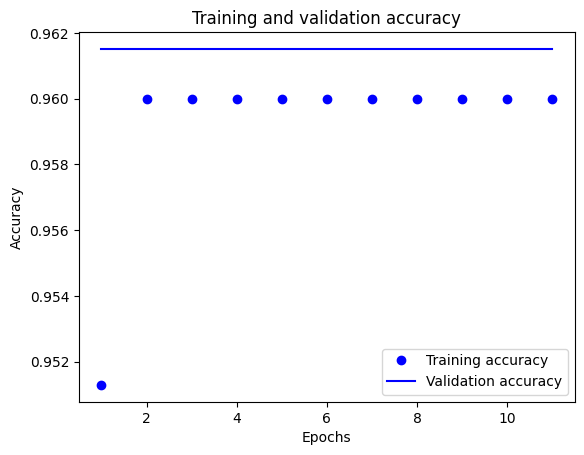

In [143]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)

# Plot accuracy by epochs training
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

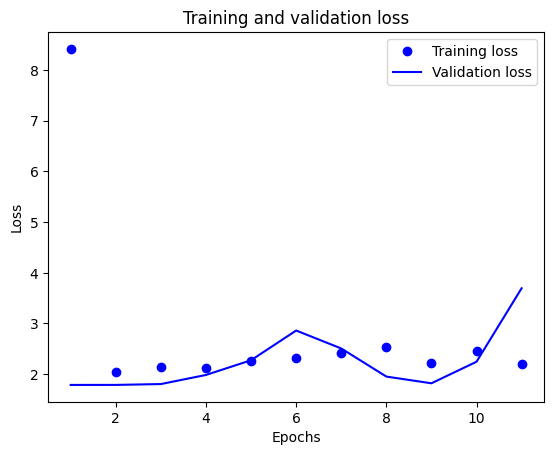

In [144]:
# Plot loss by epochs training
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [150]:
# Check model weights. Could be high because of drop-out.
model.weights

[<tf.Variable 'dense_30/kernel:0' shape=(299, 32) dtype=float32, numpy=
 array([[-1.1363092e-03, -1.4719585e-04, -3.2217833e-03, ...,
         -2.6958201e-03, -4.2471243e-03, -3.2633781e-03],
        [-1.8473526e-03, -2.3580149e-03, -3.7837795e-03, ...,
         -2.1437583e-03, -2.4804920e-03, -1.9552426e-03],
        [-1.6535691e-03, -1.3835144e-03,  1.0196537e-03, ...,
         -6.1934511e-04,  1.3153679e-03, -1.0717551e-03],
        ...,
        [-1.9506007e-03,  4.7814880e-05,  1.5566674e-03, ...,
         -6.4650475e-04, -5.8811055e-03,  1.7662058e-04],
        [-2.0816932e-03,  1.1359947e-04, -1.8320079e-03, ...,
          6.8650325e-04, -1.1071883e-04, -5.2661670e-04],
        [-4.8240637e-03, -2.5677506e-03, -4.8856740e-04, ...,
         -8.6102728e-04, -1.8247159e-03, -2.2457247e-03]], dtype=float32)>,
 <tf.Variable 'dense_30/bias:0' shape=(32,) dtype=float32, numpy=
 array([-0.0235076 , -0.02381365, -0.02336933, -0.02204099, -0.02528967,
        -0.02574583, -0.02486702, -0.0

In [151]:
# Check performance (loss & accuracy) with test set
results = model.evaluate(scaled_X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.5123 - accuracy: 0.9595


In [152]:
# Predict
y_pred = model.predict(scaled_X_test)

313/313 [==============================] - 0s 1ms/step


In [153]:
# Convert probabilities to 0 or 1, threshold = 0,5
y_squeezed = tf.squeeze(y_pred)
y_squeezed = np.array([1 if x >= 0.5 else 0 for x in y_squeezed])
y_squeezed

array([0, 0, 0, ..., 0, 0, 0])

In [154]:
# Check how many 0 and 1
unique, counts = np.unique(y_squeezed, return_counts=True)
dict(zip(unique, counts))

{0: 10000}

In [155]:
# Fetch best model from checkpoints
saved_model = load_model(checkpoint_path)
y_pred2 = saved_model.predict(scaled_X_test)
y_sq2 = tf.squeeze(y_pred2)
y_sq2 = np.array([1 if x >= 0.5 else 0 for x in y_sq2])
unique, counts = np.unique(y_sq2, return_counts=True)
dict(zip(unique, counts))

313/313 [==============================] - 1s 1ms/step


{0: 10000}

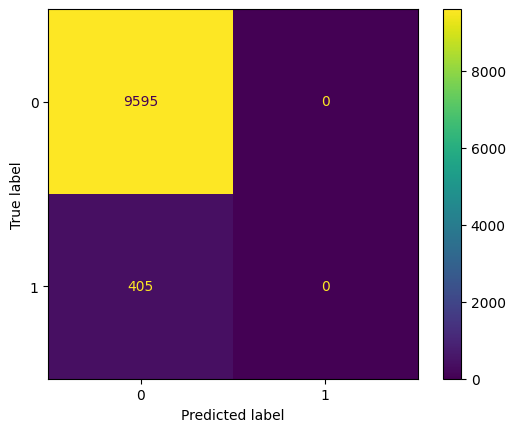

In [156]:
# Print confusion matrix
cm = confusion_matrix(y_test, y_squeezed)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [157]:
# Print classification report
print(classification_report(y_test, y_squeezed))

              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98      9595
         1.0       0.00      0.00      0.00       405

    accuracy                           0.96     10000
   macro avg       0.48      0.50      0.49     10000
weighted avg       0.92      0.96      0.94     10000



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<i>Model predicts consistently 0, regardless of parameters.  Could be due to the sparsity.
<i>Remedies should be:
<i><li>apply some noise (?)</li>
<i><li>not use Adam because this reduces the learning rate</li>
<i><li>apply incredibly high learning rates, like 0.2 or 0.3</li>
<i><li>use an absurd amount of epochs</li>
<i>But nothing seems to work...</i>

## Support Vector Machine

In [26]:
# Use smaller training data set because otherwise it takes ages to train
#X_trainsvm = scaled_X_train.iloc[0:100, :]  # for dataframe
X_trainsvm = np.array(scaled_X_train)[0:1000, :]
y_trainsvm = y_train[0:1000]

In [ ]:
svm = SVC(class_weight='balanced')   # Adjust class weights because data set is unbalanced
param_grid = {'C':[1],
              'kernel':['rbf'], 
             }
grid = GridSearchCV(svm, param_grid)

In [27]:
svm = SVC(class_weight='balanced')   # Adjust class weights because data set is unbalanced
param_grid = {'C':[0.01, 0.1, 1, 5, 10],
              'kernel':['linear','rbf', 'sigmoid', 'poly'], 
              'degree':[1, 2, 3],
              'gamma':['scale', 'auto']
             }
grid = GridSearchCV(svm, param_grid)

<i>Screen shot from Grid Fit on sample of 1000:</i>
![title](SVM1000_GridFit_2024-03-24_21h22_18.png)

<i>Screen shot from Grid Fit on sample of 5000:</i>
![title](SVM5000_GridFit_2024-03-25_10h05_05.png)

<i>Screen shot from Grid Fit on sample of 10.000:</i>
![title](SVM10000_GridFit_2024-03-25_14h32_50.png)

In [ ]:
grid.fit(X_trainsvm, y_trainsvm)

In [ ]:
display(grid.best_score_)
display(grid.best_params_)

In [28]:
#model = SVC(class_weight='balanced', kernel='rbf', degree=1, C=0.01, gamma='scale')
model = SVC(class_weight='balanced', kernel='poly', C=0.1, degree=2, gamma='auto')
model.fit(scaled_X_train, y_train)
y_predsvm = model.predict(scaled_X_test)

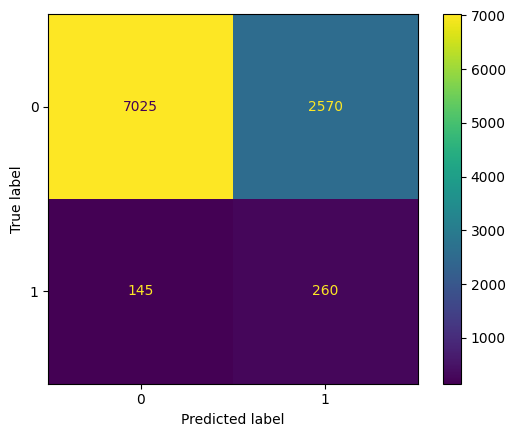

In [29]:
#cm = confusion_matrix(y_test, y_predsvm, labels=grid.classes_)
#disp = ConfusionMatrixDisplay(confusion_matrix=cm,                
#                              display_labels=grid.classes_)
cm = confusion_matrix(y_test, y_predsvm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

<i>Screen shot from Grid Fit on full training dataset after training on sample of 10.000:</i>
![title](SVM10000_ConfMatrix_2024-03-26_17h.png)

In [30]:
print(classification_report(y_test, y_predsvm))

              precision    recall  f1-score   support

         0.0       0.98      0.73      0.84      9595
         1.0       0.09      0.64      0.16       405

    accuracy                           0.73     10000
   macro avg       0.54      0.69      0.50     10000
weighted avg       0.94      0.73      0.81     10000



<i>Screen shot of classification report on full training dataset after training on sample of 10.000:</i>
![title](SVM10000_ClassReport_2024-03-26_17h.png)